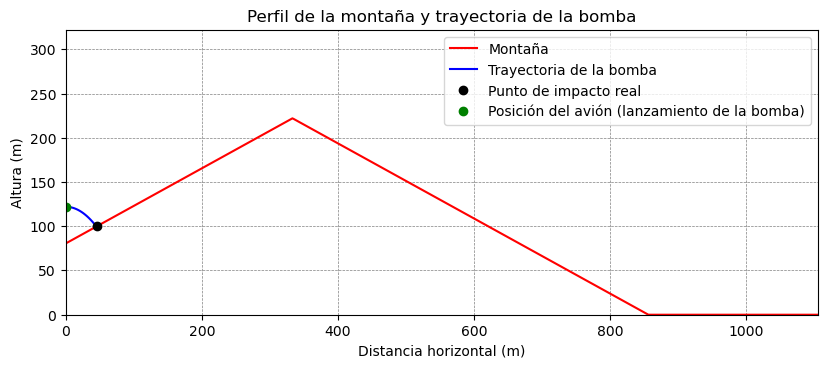

In [3]:
from tkinter import *
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def es_numero_valido(texto):
    if texto == "":
        return True
    try: 
        valor = float(texto)
        return valor >= 0 and valor < 1000
    except ValueError:
        return False

def es_angulo_valido(texto):
    if texto == "":
        return True
    try:
        valor = float(texto)
        return valor > 0 and valor < 90
    except ValueError:
        return False

def mostrar_error(mensaje):
    label_respuesta.config(text=mensaje, wraplength=400)  # Ajustar el wraplength según necesidad
    for widget in frame_canvas.winfo_children():
        widget.destroy()

def calcular():
    try:
        g = 9.81  # Aceleración debida a la gravedad en m/s^2

        ha = tALav.get()
        hm = tALmn.get()
        d = tMON.get()
        v = tVav.get()
        a = tAnmn.get()

        if ha == "" or hm == "" or d == "" or v == "" or a == "":
            mensaje_error = "Completa todos los campos"
            mostrar_error(mensaje_error)
            return

        ha = float(ha)
        hm = float(hm)
        d = float(d)
        v = float(v)
        a = float(a)

        if ha < 0 or hm < 0 or d < 0 or v < 0 or a < 0:
            mensaje_error = "Todos los valores deben ser números positivos."
            mostrar_error(mensaje_error)
            return

        b = hm / np.tan(np.radians(a))
        d2 = d - b

        def mountain(x):
            if x < d2:
                return 0
            elif d2 <= x <= d:
                return (x - d2) * np.tan(np.radians(a))
            elif d < x <= d + b:
                return hm - (x - d) * np.tan(np.radians(a))
            else:
                return 0

        def trayectoria(x, g, v, ha):
            return ha - (g / (2 * v**2)) * x**2

        tiempo_impacto_suelo = np.sqrt(2 * ha / g)
        x_impacto_suelo = v * tiempo_impacto_suelo

        x_vals = np.linspace(0, x_impacto_suelo + 1000, 1000)
        y_vals_mountain = np.array([mountain(x) for x in x_vals])

        x_impacto_montana = None
        for x in x_vals:
            if trayectoria(x, g, v, ha) <= mountain(x):
                x_impacto_montana = x
                y_impacto_montana = mountain(x)
                break

        if x_impacto_montana is None:
            x_impacto_montana = x_impacto_suelo
            y_impacto_montana = 0

        respuesta_texto = f"Impacto en la montaña a {x_impacto_montana:.2f} metros de distancia con una altura de {y_impacto_montana:.2f} metros."
        label_respuesta.config(text=respuesta_texto)

        x_vals_truncated = x_vals[x_vals <= x_impacto_montana]
        y_vals_trayectoria_truncated = np.array([trayectoria(x, g, v, ha) for x in x_vals_truncated])

        fig, ax = plt.subplots(figsize=(10, 6))

        ax.plot(x_vals, y_vals_mountain, label='Montaña', color='red')
        ax.plot(x_vals_truncated, y_vals_trayectoria_truncated, label='Trayectoria de la bomba', color='blue')
        ax.plot(x_impacto_montana, y_impacto_montana, 'ko', label='Punto de impacto real')
        ax.plot(0, ha, 'go', label='Posición del avión (lanzamiento de la bomba)')

        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        ax.set_xlabel('Distancia horizontal (m)')
        ax.set_ylabel('Altura (m)')
        ax.set_title('Perfil de la montaña y trayectoria de la bomba')
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.legend()

        ax.set_ylim(0, max(ha, hm) + 100)
        ax.set_xlim(0, x_impacto_suelo + 1000)

        for widget in frame_canvas.winfo_children():
            widget.destroy()

        canvas = FigureCanvasTkAgg(fig, master=frame_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill=BOTH)
    except ValueError:
        mensaje_error = "Por favor, ingrese valores numéricos válidos."
        mostrar_error(mensaje_error)

def limpiar():
    tMON.delete(0, END)
    tALmn.delete(0, END)
    tAnmn.delete(0, END)
    tALav.delete(0, END)
    tVav.delete(0, END)
    label_respuesta.config(text="")
    for widget in frame_canvas.winfo_children():
        widget.destroy()

raiz = Tk()
raiz.title("Proyecto de Sobrevuelo")

window_width = 1050
window_height = 800  # Aumenta la altura de la ventana principal

screen_width = raiz.winfo_screenwidth()
screen_height = raiz.winfo_screenheight()

position_top = int(screen_height / 2 - window_height / 2)
position_right = int(screen_width / 2 - window_width / 2)

raiz.geometry(f'{window_width}x{window_height}+{position_right}+{position_top}')
raiz.config(bg="gray")

# Desactiva el redimensionamiento de la ventana principal
raiz.resizable(False, False)

# Frame principal con tamaño fijo
frame1 = Frame(raiz, bg="DarkBlue", bd=15, relief="raised", width=1000, height=350)
frame1.grid_propagate(False)  # Evita que el frame cambie de tamaño con su contenido
frame1.grid(row=0, column=0, padx=10, pady=10)

style = ttk.Style()
style.configure("TLabel", background="DarkBlue", foreground="white", font=("Helvetica", 14))
style.configure("TButton", background="white", foreground="black", font=("Helvetica", 14))
style.configure("TEntry", font=("Helvetica", 14))

vcmd = (raiz.register(es_numero_valido), '%P')

ttk.Label(frame1, text="Proyecto I Bimestre", background="light blue", font=("Helvetica", 18, "bold")).grid(row=0, column=0, columnspan=2, pady=(0, 10))

ttk.Label(frame1, text="Ingresa la distancia de la montaña en metros:").grid(row=1, column=0, sticky="w", padx=15, pady=5)
tMON = ttk.Entry(frame1, validate="key", validatecommand=vcmd, width=10)  # Ancho fijo para el Entry
tMON.grid(row=1, column=1, pady=5, padx=5, sticky="ew")

ttk.Label(frame1, text="Ingresa la altura de la montaña en metros:").grid(row=2, column=0, sticky="w", padx=15, pady=5)
tALmn = ttk.Entry(frame1, validate="key", validatecommand=vcmd, width=10)  # Ancho fijo para el Entry
tALmn.grid(row=2, column=1, pady=5, padx=5, sticky="ew")

ttk.Label(frame1, text="Ingresa el ángulo de la montaña en grados:").grid(row=3, column=0, sticky="w", padx=15, pady=5)
tAnmn = ttk.Entry(frame1, validate="key", validatecommand=(raiz.register(es_angulo_valido), '%P'), width=10)  # Ancho fijo para el Entry
tAnmn.grid(row=3, column=1, pady=5, padx=5, sticky="ew")

ttk.Label(frame1, text="Ingresa la altura del avión en metros:").grid(row=4, column=0, sticky="w", padx=15, pady=5)
tALav = ttk.Entry(frame1, validate="key", validatecommand=vcmd, width=10)  # Ancho fijo para el Entry
tALav.grid(row=4, column=1, pady=5, padx=5, sticky="ew")

ttk.Label(frame1, text="Ingresa la velocidad del avión en metros/segundos:").grid(row=5, column=0, sticky="w", padx=15, pady=5)
tVav = ttk.Entry(frame1, validate="key", validatecommand=vcmd, width=10)  # Ancho fijo para el Entry
tVav.grid(row=5, column=1, pady=5, padx=5, sticky="ew")

ttk.Label(frame1, text="Respuesta:").grid(row=6, column=0, sticky="w", padx=15, pady=10)
label_respuesta = ttk.Label(frame1, text="", background="DarkBlue", foreground="white", font=("Helvetica", 12), wraplength=300)
label_respuesta.grid(row=6, column=2, padx=15, pady=10, sticky="ew")

boton_calcular = ttk.Button(frame1, text="Calcular", command=calcular)
boton_calcular.grid(row=7, column=0, pady=10, padx=5, sticky="ew")

boton_limpiar = ttk.Button(frame1, text="Limpiar", command=limpiar)
boton_limpiar.grid(row=7, column=1, pady=10, padx=5, sticky="ew")

# Frame para el gráfico con tamaño ajustable
frame_canvas = Frame(raiz, bg="white", bd=15, relief="raised", width=1000, height=400)
frame_canvas.pack_propagate(False)  # Evita que el frame cambie de tamaño con su contenido
frame_canvas.grid(row=1, column=0, padx=10, pady=10)

# Configura la disposición de la ventana principal para evitar redimensionamientos no deseados
raiz.grid_rowconfigure(0, weight=1)
raiz.grid_rowconfigure(1, weight=1)
raiz.grid_columnconfigure(0, weight=1)
raiz.mainloop()


